In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

#df = pd.read_csv('preprocess_v1_remove_cor.csv')
#df = pd.read_csv('preprocess_v1KS_remove_cor.csv')

df = pd.read_csv('preprocess_v1_treeslect.csv')
#df = pd.read_csv('preprocess_v1KS_treeslect.csv')

#df = pd.read_csv('preprocess_v1.csv')
#df = pd.read_csv('preprocess_v1KS.csv')

In [2]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

y = y.apply(lambda x: math.log(x))

---

In [3]:
### Data Standardization
### Y -> log(y)
from sklearn.datasets import load_iris
from sklearn import preprocessing

X_standardized = preprocessing.scale(X)

In [4]:
# Spilt to training set and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10)

---
## Regression
#### References:
- https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn
- https://www.itread01.com/content/1546844582.html
- https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn

In [5]:
from sklearn.linear_model import LinearRegression

Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)

model_est = Linear_model.predict(X_train)

print('\nCoefficients:', Linear_model.coef_)
print('\nIntercept:', Linear_model.intercept_)
print('\nR-square', r2_score(y_train, model_est))

# Predictions
predictions = Linear_model.predict(X_test)
print('\nPredictions for the testing set: \n', predictions)
print('\nR-square - prediction', r2_score(y_test, predictions))


Coefficients: [ 0.153223   -0.55518011  0.17398611 -0.04789333 -0.10518526  0.0216503
  0.08433377 -0.12009653  0.04314909 -0.11418165 -0.31934181  0.38623998
 -0.13139318 -0.06623646 -0.06743336  0.01968963 -0.21762091  0.36398115
 -0.09824745  0.06554232]

Intercept: 13.480877973372825

R-square 0.4599465468077696

Predictions for the testing set: 
 [12.78779754 13.51298831 12.33419884 ... 13.36822717 13.01151101
 12.86009308]

R-square - prediction 0.4418431690843295


In [6]:
# Lasso Regression
from sklearn.linear_model import Lasso, LassoCV

Lasso_model = LassoCV()
Lasso_model.fit(X_train, y_train)

model_est = Linear_model.predict(X_train)
print('The best alpha：', Lasso_model.alpha_)

print('\nCoefficients:', Lasso_model.coef_)
print('\nIntercept:', Lasso_model.intercept_)

print('Mean Absolute Error:', mean_absolute_error(y_train, model_est))
print('Mean Squared Error:', mean_squared_error(y_train, model_est))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, model_est)))
print('\nR-square', r2_score(y_train, model_est))

# Predictions
predictions = Lasso_model.predict(X_test)
print('\nPredictions for the testing set: \n', predictions)
print('\nR-square - prediction', r2_score(y_test, predictions))

The best alpha： 0.0082648406646829

Coefficients: [ 0.13422138 -0.5351493   0.09189888 -0.03767573 -0.1002686   0.01900206
  0.07561331 -0.07646308  0.03610961 -0.13448328 -0.31073511  0.37666185
 -0.12526539 -0.05683169 -0.05921754  0.00470455 -0.19064317  0.3500922
 -0.02528006  0.        ]

Intercept: 13.480104968853286
Mean Absolute Error: 0.78288910193003
Mean Squared Error: 1.1209146981691445
Root Mean Squared Error: 1.0587325904916427

R-square 0.4599465468077696

Predictions for the testing set: 
 [12.82779596 13.44929305 12.36600682 ... 13.37498203 12.99252747
 12.92511957]

R-square - prediction 0.4374972237908993


In [7]:
# Ridge Regression
from sklearn.linear_model import Ridge, RidgeCV

Ridge_model = RidgeCV()
Ridge_model.fit(X_train, y_train)

model_est = Ridge_model.predict(X_train)
print('The best alpha：', Ridge_model.alpha_)

print('\nCoefficients:', Ridge_model.coef_)
print('Intercept:', Ridge_model.intercept_)

print('\nMean Absolute Error:', mean_absolute_error(y_train, model_est))
print('Mean Squared Error:', mean_squared_error(y_train, model_est))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, model_est)))
print('\nR-square', r2_score(y_train, model_est))

# Predictions
predictions = Ridge_model.predict(X_test)
print('\nPredictions for the testing set: \n', predictions)
print('\nR-square - prediction', r2_score(y_test, predictions))

The best alpha： 10.0

Coefficients: [ 0.15017584 -0.55148336  0.16935822 -0.0485403  -0.10496742  0.02293725
  0.08295002 -0.11809822  0.04332206 -0.11949664 -0.3146705   0.38347705
 -0.13184351 -0.06370554 -0.06801998  0.01955361 -0.21586047  0.36216242
 -0.09536209  0.06351525]
Intercept: 13.480856450155368

Mean Absolute Error: 0.7829673204065689
Mean Squared Error: 1.1209367944044513
Root Mean Squared Error: 1.058743025669804

R-square 0.4599359009056332

Predictions for the testing set: 
 [12.79185131 13.51209882 12.33681245 ... 13.36707549 13.01470257
 12.86290283]

R-square - prediction 0.44159693757805296


---
## Planting Trees

In [13]:
# RandomForestClassifier
# https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/#:~:text=Random%20forest%20is%20a%20type,algorithm%20based%20on%20ensemble%20learning.&text=The%20random%20forest%20algorithm%20combines,the%20name%20%22Random%20Forest%22.
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 2)
rf = rf.fit(X_train, y_train)

In [14]:

model_est = rf.predict(X_train)
prediction = rf.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_train, model_est))
print('Mean Squared Error:', mean_squared_error(y_train, model_est))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, model_est)))
print('R-square', r2_score(y_train, model_est))
print('R-square - prediction', r2_score(y_test, prediction))

Mean Absolute Error: 0.26275308908146827
Mean Squared Error: 0.30704438523436206
Root Mean Squared Error: 0.5541158590352401
R-square 0.8520669050018286
R-square - prediction 0.4835013833870113


Text(0.5, 0, 'Random Forest Feature Importance')

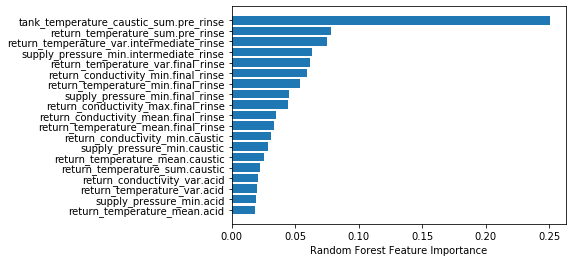

In [15]:
from matplotlib import pyplot as plt

sorted_idx = rf.feature_importances_.argsort()

plt.barh(X.columns[1:20], rf.feature_importances_[sorted_idx][1:20])
plt.xlabel("Random Forest Feature Importance")

#plt.barh(X.columns, clf.feature_importances_)

In [12]:
# Gradient Boosting Tree
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

GB_clf = GradientBoostingRegressor(**params)
GB_clf = GB_clf.fit(X_train, y_train)

model_est = GB_clf.predict(X_train)
prediction = GB_clf.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_train, model_est))
print('Mean Squared Error:', mean_squared_error(y_train, model_est))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, model_est)))
print('R-square', r2_score(y_train, model_est))
print('R-square prediction', r2_score(y_test, prediction))

Mean Absolute Error: 0.5009414799535938
Mean Squared Error: 0.5451238793733112
Root Mean Squared Error: 0.738325049942985
R-square 0.737360894674719
R-square prediction 0.6341645598087583


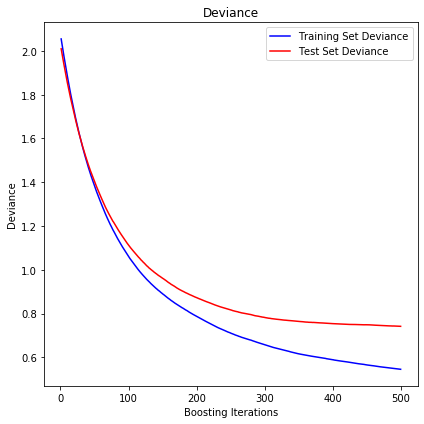

In [16]:
# 3https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(GB_clf.staged_predict(X_test)):
    test_score[i] = GB_clf.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, GB_clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

Text(0.5, 0, 'Gradient Boosting Tree Feature Importance')

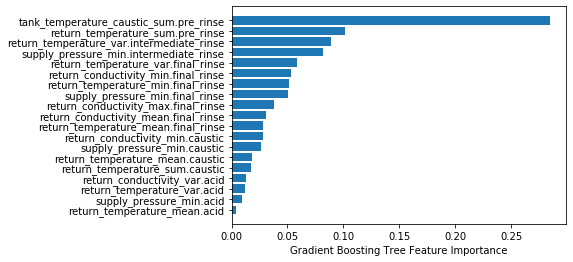

In [17]:
from matplotlib import pyplot as plt

sorted_idx = GB_clf.feature_importances_.argsort()
plt.barh(X.columns[1:20], GB_clf.feature_importances_[sorted_idx][1:20])
plt.xlabel("Gradient Boosting Tree Feature Importance")

---